In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time as tm

# directly using tree was not working so had to import thr sklearner separately 
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn import decomposition
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

from sklearn.metrics.cluster import homogeneity_score
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture


# directly using tree was not working so had to import thr sklearner separately 

from sklearn import metrics 
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [321]:
pwd

'/Users/ssandesh/ML_Gatech/Project3'

## Dataset 1: Water Potability

In [322]:
dataset1 = pd.read_csv('datasets/water_potability.csv')
dataset1 = shuffle(dataset1) 
dataset1.dropna(inplace=True)
X_1  = dataset1.iloc[:, :-1]
Y_1 =  dataset1.iloc[:, -1]
X_1 = preprocessing.scale(X_1)
dataset1.shape


(2011, 10)

In [323]:
num_dims = dataset1.shape[1]
print(num_dims)

10


In [324]:
# https://towardsdatascience.com/principal-component-analysis-part-1-the-different-formulations-6508f63a5553
all_dims = np.arange(1,num_dims,1)
random_state = 7
print("Components | ", " Total % of variance explained | ", " Mean Squared Error" )
for dim in all_dims:
    pca = decomposition.PCA(n_components=dim,  random_state=random_state)
    pca.fit_transform(X_1)
    # pca.components_ is the Eigen value and we also need the pseudo-inverse
    x_prime = pca.fit_transform(X_1)
    eigen_values = pca.components_
    A = np.linalg.pinv(eigen_values.T)
    # pojection to the reduced dimensionality space
    Z = np.dot(x_prime, A)
    err = mean_squared_error(X_1, Z)  
    print(dim, " \t\t ", sum(pca.explained_variance_ratio_),  "\t\t " , err )

Components |   Total % of variance explained |   Mean Squared Error
1  		  0.1341081182749985 		  0.8658918817250015
2  		  0.26416119760487616 		  0.7358388023951237
3  		  0.38037430120565835 		  0.6196256987943418
4  		  0.4926585932000982 		  0.5073414067999011
5  		  0.6043295649685735 		  0.39567043503142607
6  		  0.7121681653234964 		  0.2878318346765036
7  		  0.8178894571699449 		  0.1821105428300556
8  		  0.9149464645537031 		  0.08505353544629651
9  		  0.9999999999999997 		  1.4297615563114404e-29


In [325]:
best_component_size = 8
pca_best_1 = decomposition.PCA(n_components=best_component_size, random_state=random_state)
X1_transform = pca_best_1.fit_transform(X_1)
all_new_row = np.arange(1,best_component_size,1)
X_1_df = pd.DataFrame(X_1)
for comp in all_new_row:
    col_name = "newPCACol"+str(comp)
    X_1_df[col_name] = X1_transform[:,comp]
    X_1_df[col_name] = X1_transform[:,comp]
X_1_df.head()

,0,1,2,3,4,5,6,7,8,newPCACol1,newPCACol2,newPCACol3,newPCACol4,newPCACol5,newPCACol6,newPCACol7
0,0.119653,-1.221604,-0.655264,0.328328,1.164119,2.048208,-0.615263,-0.418111,-1.047188,1.098573,0.736662,-0.291392,-1.118556,1.257321,1.780831,0.739759
1,0.552490,1.484288,1.213873,-2.408629,-0.620977,0.091525,0.570607,0.079631,-0.017704,-2.381904,1.450444,-0.330897,0.455972,0.508572,-1.119973,-0.448489
2,-0.054818,0.710311,-0.675801,0.326804,0.545315,-1.784851,0.884395,-0.083107,-0.781384,0.141908,-0.494225,-0.313391,1.758983,-0.847312,-0.235958,-0.661271
3,-0.557103,-0.816796,0.080245,-1.425705,-0.141880,1.521211,0.799429,-0.926725,-0.097368,-0.025037,2.288729,-0.081806,-0.450263,0.432570,0.644898,-0.153845
4,-0.138891,-0.407513,-0.193313,-0.168683,-0.058721,-0.076748,1.081519,-0.393954,1.112013,0.400531,0.891667,0.499037,-0.155350,-1.017276,-0.580627,-0.084901


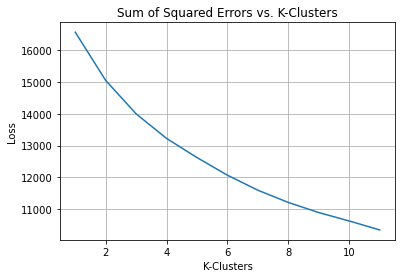

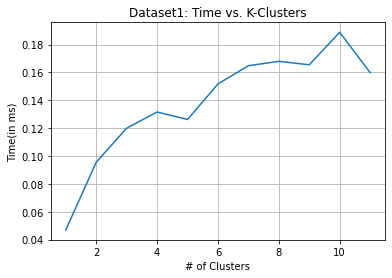

In [326]:
random_state = 7
clusters = np.arange(1,12,1)
sum_of_squared_distances = []
time_array = []
X_1_new = X_1_df.to_numpy()
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_state)
    start_time = tm.time()
    kmeans.fit(X1_transform)
    end_time = tm.time()
    time_array.append(end_time - start_time)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters,sum_of_squared_distances)
plt.title('Sum of Squared Errors vs. K-Clusters')
plt.xlabel('K-Clusters')
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure()
plt.plot(clusters,time_array)
plt.title('Dataset1: Time vs. K-Clusters')
plt.xlabel('# of Clusters')
plt.ylabel("Time(in ms)")
plt.grid()
plt.show()

In [327]:
random_state = 7
clusters = np.arange(2,15,1)
sum_of_squared_distances = []
X_1_new = X_1_df.to_numpy()
silhouette_scores = []
homog_scores = []
for cluster in clusters:
    clusterer = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_state)
    cluster_labels = clusterer.fit_predict(X1_transform)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X1_transform, cluster_labels)
    homog_score = homogeneity_score(Y_1, cluster_labels)
    print(
        "For n_clusters =",
        cluster,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    print(
        "For n_clusters =",
        cluster,
        "The average homogeneity_score is :",
        homog_score,
    )
    silhouette_scores.append(silhouette_avg)
    homog_scores.append(homog_score)


For n_clusters = 2 The average silhouette_score is : 0.08880106626043309
For n_clusters = 2 The average homogeneity_score is : 0.00024027909817682906
For n_clusters = 3 The average silhouette_score is : 0.08389688059595131
For n_clusters = 3 The average homogeneity_score is : 0.0041329501332429824
For n_clusters = 4 The average silhouette_score is : 0.08248117627925325
For n_clusters = 4 The average homogeneity_score is : 0.0037482056532745895
For n_clusters = 5 The average silhouette_score is : 0.0830217865763978
For n_clusters = 5 The average homogeneity_score is : 0.00382007289835293
For n_clusters = 6 The average silhouette_score is : 0.08406464128349073
For n_clusters = 6 The average homogeneity_score is : 0.003531174472962257
For n_clusters = 7 The average silhouette_score is : 0.08801713559456936
For n_clusters = 7 The average homogeneity_score is : 0.004464322124180512
For n_clusters = 8 The average silhouette_score is : 0.08806447000960356
For n_clusters = 8 The average homoge

In [328]:
## Expectation Maximization

For n_clusters = 2 The average silhouette_score is : 0.09774922434489977
For n_clusters = 2 The average homogeneity_score is : 0.01805088394815449
For n_clusters = 3 The average silhouette_score is : 0.038434490034049085
For n_clusters = 3 The average homogeneity_score is : 0.01769582919801025
For n_clusters = 4 The average silhouette_score is : 0.02864961703864158
For n_clusters = 4 The average homogeneity_score is : 0.020873980075275626
For n_clusters = 5 The average silhouette_score is : 0.04193003394106205
For n_clusters = 5 The average homogeneity_score is : 0.017106948295196257
For n_clusters = 6 The average silhouette_score is : 0.026204600838773906
For n_clusters = 6 The average homogeneity_score is : 0.0201323236144935
For n_clusters = 7 The average silhouette_score is : 0.028797417956378007
For n_clusters = 7 The average homogeneity_score is : 0.008500520146284269
For n_clusters = 8 The average silhouette_score is : 0.031193820927721813
For n_clusters = 8 The average homogene

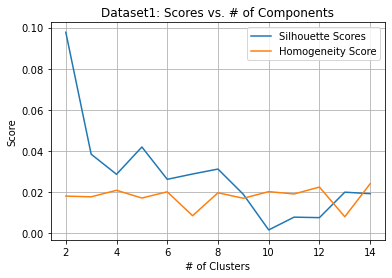

In [330]:
# https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

range_n_clusters = np.arange(2,15,1)
silhouette_scores_gm_1 = []
homog_scores_gn_1 = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, max_iter=1000, random_state=random_state)
    cluster_labels = clusterer.fit_predict(X1_transform)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X1_transform, cluster_labels)
    homog_score = homogeneity_score(Y_1, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    print(
        "For n_clusters =",
        n_clusters,
        "The average homogeneity_score is :",
        homog_score,
    )
    silhouette_scores_gm_1.append(silhouette_avg)
    homog_scores_gn_1.append(homog_score)

plt.figure()
plt.plot(range_n_clusters,silhouette_scores_gm_1, label="Silhouette Scores")
plt.plot(range_n_clusters,homog_scores_gn_1,  label="Homogeneity Score")
plt.title('Dataset1: Scores vs. # of Components')
plt.xlabel('# of Clusters')
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


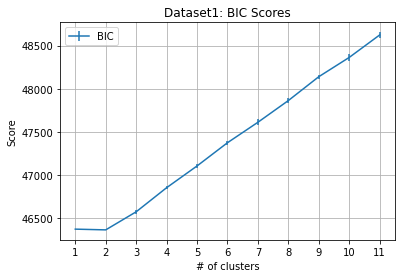

In [331]:
n_clusters=np.arange(1, 12, 1)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n_components=n, n_init=2, max_iter=1000).fit(X1_transform) 
        
        tmp_bic.append(gmm.bic(X1_transform))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("Dataset1: BIC Scores")
plt.xticks(n_clusters)
plt.xlabel("# of clusters")
plt.ylabel("Score")
plt.legend()
plt.grid()

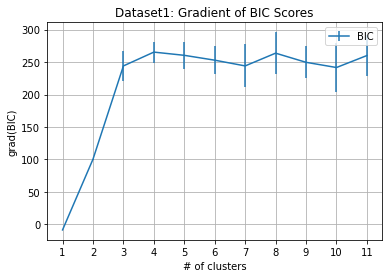

In [332]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Dataset1: Gradient of BIC Scores")
plt.xticks(n_clusters)
plt.xlabel("# of clusters")
plt.ylabel("grad(BIC)")
plt.legend()
plt.grid()

## # Dataset 2: Raisin Dataset

In [333]:
dataset2 = pd.read_excel('datasets/Raisin_Dataset.xlsx')
dataset2 = shuffle(dataset2) 
dataset2.dropna(inplace=True)
X_2 = dataset2.iloc[:, :-1]
Y_2 =  dataset2.iloc[:, -1]
X_2 = preprocessing.scale(X_2)
num_dims_2= dataset2.shape[1]

In [334]:
# https://towardsdatascience.com/principal-component-analysis-part-1-the-different-formulations-6508f63a5553
all_dims = np.arange(1,num_dims_2,1)
random_state = 7
print("Components | ", " Total % of variance explained | ", " Mean Squared Error" )
for dim in all_dims:
    pca = decomposition.PCA(n_components=dim,  random_state=random_state)
    pca.fit_transform(X_2)
    # pca.components_ is the Eigen value and we also need the pseudo-inverse
    x_prime = pca.fit_transform(X_2)
    eigen_values = pca.components_
    A = np.linalg.pinv(eigen_values.T)
    # pojection to the reduced dimensionality space
    Z = np.dot(x_prime, A)
    err = mean_squared_error(X_2, Z)  
    print(dim, " \t\t ", sum(pca.explained_variance_ratio_),  "\t\t " , err )

Components |   Total % of variance explained |   Mean Squared Error
1  		  0.6903269444053384 		  0.3096730555946622
2  		  0.8979252929009331 		  0.10207470709906773
3  		  0.9877037883182951 		  0.01229621168170555
4  		  0.9958215757983605 		  0.00417842420164
5  		  0.9989370427358726 		  0.0010629572641279723
6  		  0.999855641465737 		  0.00014435853426292188
7  		  0.9999999999999999 		  1.630840598664993e-30


In [314]:
best_component_size = 4
pca_best_2 = decomposition.PCA(n_components=best_component_size, random_state=random_state)
X2_transform = pca_best_2.fit_transform(X_2)
all_new_row = np.arange(1,best_component_size,1)
X_2_df = pd.DataFrame(X_2)
for comp in all_new_row:
    col_name = "newPCACol"+str(comp)
    X_2_df[col_name] = X2_transform[:,comp]
    X_2_df[col_name] = X2_transform[:,comp]
X_2_df.head()

,0,1,2,3,4,5,6,newPCACol1,newPCACol2,newPCACol3
0,0.215643,0.444786,0.163853,0.634670,0.269247,-0.241799,0.382503,0.512798,-0.199956,-0.063075
1,-0.265162,-0.215515,-0.170099,0.154396,-0.293671,0.412389,-0.238405,-0.098191,-0.440169,-0.083953
2,-0.884524,-0.687469,-1.146381,0.508595,-0.862797,0.124139,-0.845783,0.713108,-0.685963,-0.029130
3,-0.883292,-0.864466,-0.776333,-0.261261,-0.847851,-0.846330,-0.837257,0.726424,0.614350,-0.133534
4,0.741676,1.208227,0.487364,1.009650,0.887335,-1.813117,1.178374,1.685410,0.774944,0.018114


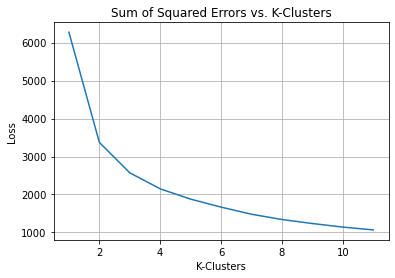

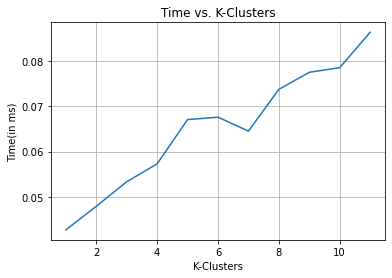

[0.04275107383728027, 0.047943115234375, 0.0533452033996582, 0.05728507041931152, 0.06702804565429688, 0.06756305694580078, 0.0644981861114502, 0.07367897033691406, 0.07744407653808594, 0.07845902442932129, 0.08625388145446777]


In [335]:
random_state = 8
clusters = np.arange(1,12,1)
sum_of_squared_distances = []
time_array = []
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_state)
    start_time = tm.time()
    kmeans.fit(X2_transform)
    end_time = tm.time()
    time_array.append(end_time - start_time)
    sum_of_squared_distances.append(kmeans.inertia_)
    
plt.figure()
plt.plot(clusters,sum_of_squared_distances)
plt.title('Sum of Squared Errors vs. K-Clusters')
plt.xlabel('K-Clusters')
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure()
plt.plot(clusters,time_array)
plt.title('Time vs. K-Clusters')
plt.xlabel('K-Clusters')
plt.ylabel("Time(in ms)")
plt.grid()
plt.show()

print(time_array)

In [336]:
random_state = 7
clusters = np.arange(2,15,1)
sum_of_squared_distances = []
silhouette_scores = []
homog_scores = []
for cluster in clusters:
    clusterer = KMeans(n_clusters=cluster, max_iter=1000, random_state=random_state)
    cluster_labels = clusterer.fit_predict(X2_transform)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X2_transform, cluster_labels)
    homog_score = homogeneity_score(Y_2, cluster_labels)
    print(
        "For n_clusters =",
        cluster,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    print(
        "For n_clusters =",
        cluster,
        "The average homogeneity_score is :",
        homog_score,
    )
    silhouette_scores.append(silhouette_avg)
    homog_scores.append(homog_score)

For n_clusters = 2 The average silhouette_score is : 0.44188155205044066
For n_clusters = 2 The average homogeneity_score is : 7.068103221586796e-05
For n_clusters = 3 The average silhouette_score is : 0.31019350707705795
For n_clusters = 3 The average homogeneity_score is : 0.0017010937272157424
For n_clusters = 4 The average silhouette_score is : 0.2960141288306025
For n_clusters = 4 The average homogeneity_score is : 0.0023504885001239175
For n_clusters = 5 The average silhouette_score is : 0.3030515313500581
For n_clusters = 5 The average homogeneity_score is : 0.0019196785674026923
For n_clusters = 6 The average silhouette_score is : 0.267736413215478
For n_clusters = 6 The average homogeneity_score is : 0.0025087888358056028
For n_clusters = 7 The average silhouette_score is : 0.27746578563421503
For n_clusters = 7 The average homogeneity_score is : 0.004766104165707773
For n_clusters = 8 The average silhouette_score is : 0.26654085769667646
For n_clusters = 8 The average homogen

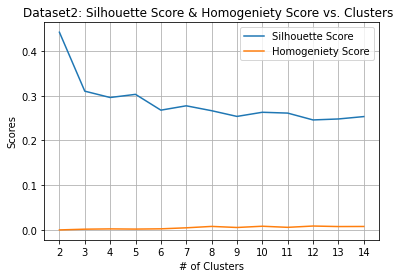

In [337]:
plt.figure()
plt.plot(clusters, silhouette_scores, label='Silhouette Score')
plt.plot(clusters, homog_scores, label='Homogeniety Score')
plt.title('Dataset2: Silhouette Score & Homogeniety Score vs. Clusters  ')
plt.xticks(clusters)
plt.xlabel('# of Clusters')
plt.ylabel("Scores")
plt.legend(loc="best")
plt.grid()
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.2751864973562649
For n_clusters = 2 The average homogeneity_score is : 5.7323370466978356e-05
For n_clusters = 3 The average silhouette_score is : 0.1919375784512446
For n_clusters = 3 The average homogeneity_score is : 0.0002209641606414055
For n_clusters = 4 The average silhouette_score is : 0.12211734412708539
For n_clusters = 4 The average homogeneity_score is : 0.0006393743908820685
For n_clusters = 5 The average silhouette_score is : 0.15212697831469624
For n_clusters = 5 The average homogeneity_score is : 0.0032041730032603944
For n_clusters = 6 The average silhouette_score is : 0.1535493079984238
For n_clusters = 6 The average homogeneity_score is : 0.0029581260252390888
For n_clusters = 7 The average silhouette_score is : 0.06731258056351744
For n_clusters = 7 The average homogeneity_score is : 0.004944854299341028
For n_clusters = 8 The average silhouette_score is : 0.0834197300217974
For n_clusters = 8 The average homoge

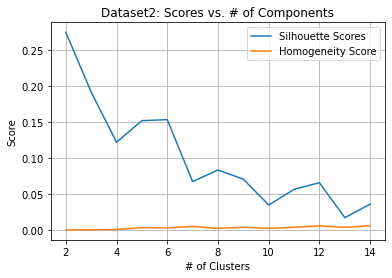

In [338]:
# Expeactation Maxmization
# https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

range_n_clusters = np.arange(2,15,1)
silhouette_scores_2 = []
homog_scores_2 = []
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components=n_clusters, max_iter=1000, random_state=random_state)
    cluster_labels = clusterer.fit_predict(X2_transform)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X2_transform, cluster_labels)
    homog_score = homogeneity_score(Y_2, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    print(
        "For n_clusters =",
        n_clusters,
        "The average homogeneity_score is :",
        homog_score,
    )
    silhouette_scores_2.append(silhouette_avg)
    homog_scores_2.append(homog_score)

plt.figure()
plt.plot(range_n_clusters,silhouette_scores_2, label="Silhouette Scores")
plt.plot(range_n_clusters,homog_scores_2,  label="Homogeneity Score")
plt.title('Dataset2: Scores vs. # of Components')
plt.xlabel('# of Clusters')
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


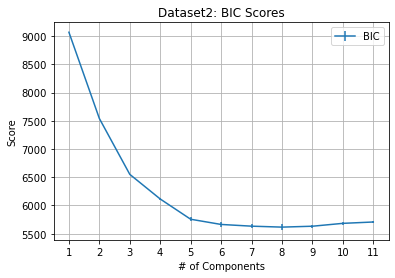

In [339]:
n_clusters=np.arange(1, 12, 1)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n_components=n, n_init=2, max_iter=1000).fit(X2_transform) 
        
        tmp_bic.append(gmm.bic(X2_transform))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("Dataset2: BIC Scores")
plt.xticks(n_clusters)
plt.xlabel("# of Components")
plt.ylabel("Score")
plt.legend()
plt.grid()


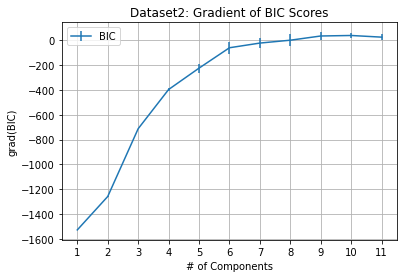

In [340]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Dataset2: Gradient of BIC Scores")
plt.xticks(n_clusters)
plt.xlabel("# of Components")
plt.ylabel("grad(BIC)")
plt.legend()
plt.grid()

## Neural Network

In [341]:
# on the smaller component space

In [342]:
X_train, X_test, y_train, y_test = train_test_split( X1_transform, Y_1, test_size=0.20, random_state=7)

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

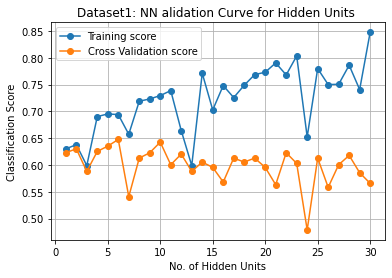

In [343]:
# hyperparameter tuning
hidden_unit_size = 30
test_data = np.zeros(hidden_unit_size)
train_data = np.zeros(hidden_unit_size)
hidden_layers = list(range(1, hidden_unit_size+1)) 

for i in hidden_layers:
    clf_NN = MLPClassifier(solver='lbfgs', activation='relu',
                    hidden_layer_sizes=(i,2), random_state=7)
    clf_NN.fit(X_train,y_train)
    y_pred = clf_NN.predict(X_test)
    y_pred_train = clf_NN.predict(X_train)
    test_data[i-1] = metrics.accuracy_score(y_test, y_pred)
    train_data[i-1] = metrics.accuracy_score(y_train, y_pred_train)

plt.figure()
plt.plot(hidden_layers,train_data ,'o-', label='Training score')
plt.plot(hidden_layers,test_data ,'o-', label='Cross Validation score')
plt.title('Dataset1: NN alidation Curve for Hidden Units ')
plt.xlabel('No. of Hidden Units')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
plt.ticklabel_format(useOffset=False)
plt.show()

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

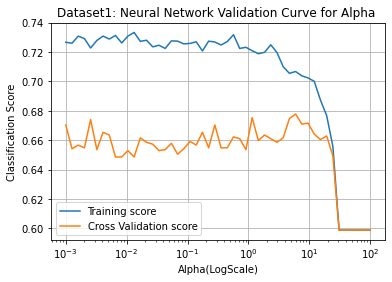

In [344]:
# Two hyperparameter to tune are the Learning Rate and numeber of hidden perceptrons hidden_layer_sizes
cv = StratifiedKFold(n_splits=5)
alpha_val = np.logspace(-3, 2, 50)
clf_NN = MLPClassifier(solver='lbfgs', activation='relu',
                    hidden_layer_sizes=(8,2), random_state=7)
train_scores, test_scores = validation_curve(clf_NN, X_train, y_train, param_name="alpha",
                                             param_range=alpha_val, cv=cv, n_jobs=-1)

plt.figure()
plt.semilogx(alpha_val, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(alpha_val, np.mean(test_scores, axis=1), label='Cross Validation score')
plt.title('Dataset1: Neural Network Validation Curve for Alpha ')
plt.xlabel('Alpha(LogScale)')
plt.ylabel("Classification Score")
plt.legend(loc="best")
plt.grid()
#plt.ticklabel_format(useOffset=False)
plt.show()

Fit time with reduced features = 0.15752291679382324
Inference time with reduced features = 0.0009970664978027344
64.51612903225806


/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<AxesSubplot:>

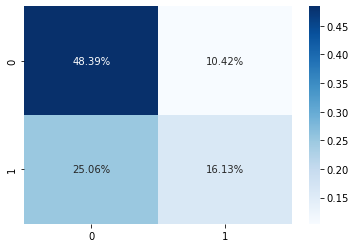

In [390]:
best_hidden_layers=(8,2)
best_alpha=0.01
clf_NN_best= MLPClassifier(solver='lbfgs', activation='relu',alpha=best_alpha,
                    hidden_layer_sizes=best_hidden_layers, random_state=7)
t_before = tm.time()
clf_NN_best = clf_NN_best.fit(X_train,y_train)
t_after = tm.time()
print('Fit time with reduced features =',  t_after - t_before)
t_before = tm.time()
y_pred = clf_NN_best.predict(X_test)
t_after = tm.time()
print('Inference time with reduced features =',  t_after - t_before)
#inference_time[4] = t_after - t_before
#accuracy_after[4] = metrics.accuracy_score(y_test, y_pred)*100
print(metrics.accuracy_score(y_test, y_pred)*100)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')



/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

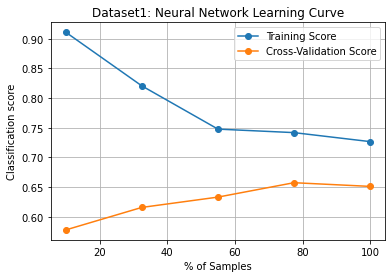

In [375]:
cv = StratifiedKFold(n_splits=5)
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes,train_scores, test_scores = learning_curve(clf_NN_best, X_train,
                                           y_train,cv=cv,n_jobs=-1,train_sizes=train_sizes)
train_sizes=(train_sizes/train_sizes[-1])*100
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-Validation Score')
plt.grid()
plt.title('Dataset1: Neural Network Learning Curve')
plt.xlabel('% of Samples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.show()

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

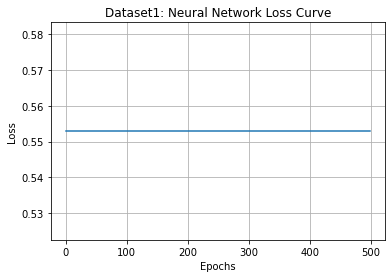

In [376]:
num_epochs = 500
loss_epochs = np.zeros(num_epochs)
for epoch in range(num_epochs):
    clf_NN_best.fit(X_train,y_train)
    loss_epochs[epoch] = clf_NN_best.loss_
    
plt.figure()
plt.plot(loss_epochs)
plt.grid()
plt.title('Dataset1: Neural Network Loss Curve')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.show()

In [ ]:
# After clusterring and adding featues

In [378]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split( X_1_new , Y_1, test_size=0.20, random_state=7)

Fit time with Clusttering and added new features = 0.17005419731140137
Inferece time with Clusttering and added new features = 0.0009818077087402344
64.01985111662532


/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<AxesSubplot:>

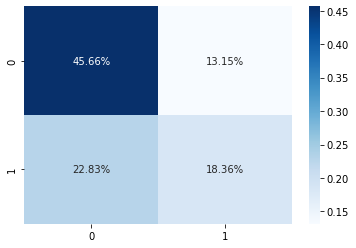

In [389]:
best_hidden_layers=(8,2)
best_alpha=0.02
clf_NN_best_c= MLPClassifier(solver='lbfgs', activation='relu',alpha=best_alpha,
                    hidden_layer_sizes=best_hidden_layers, random_state=7)
t_before = tm.time()
clf_NN_best = clf_NN_best_c.fit(X_train_c,y_train_c)
t_after = tm.time()
print('Fit time with Clusttering and added new features =',  t_after - t_before)
t_before = tm.time()
y_pred_c = clf_NN_best_c.predict(X_test_c)
t_after = tm.time()
print('Inferece time with Clusttering and added new features =',  t_after - t_before)
#accuracy_after[4] = metrics.accuracy_score(y_test, y_pred)*100
print(metrics.accuracy_score(y_test_c, y_pred_c)*100)
cm=confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')



/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/ssandesh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed t

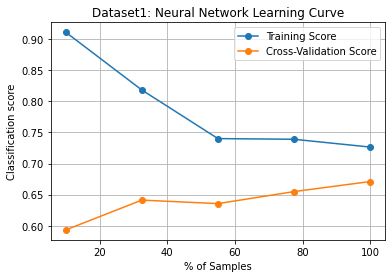

In [392]:
cv = StratifiedKFold(n_splits=5)
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes,train_scores, test_scores = learning_curve(clf_NN_best_c, X_train,
                                           y_train,cv=cv,n_jobs=-1,train_sizes=train_sizes)
train_sizes=(train_sizes/train_sizes[-1])*100
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-Validation Score')
plt.grid()
plt.title('Dataset1: Neural Network Learning Curve')
plt.xlabel('% of Samples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.show()